In [1]:
# set work dir
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.reload_library()
plt.style.use("science")
from matplotlib import ticker
import tol_colors as tc

In [3]:
dims = [1,2,3]

In [4]:
def drawPlot(dims, n, d, e):
    regrets = getRow(dims, n, d, e)
    # color map
    cmap = tc.tol_cmap("sunset")(np.linspace(0, 1, 11))
    cset =  tc.tol_cset('light')
    colors = [cset.mint, cset.pink, cset.orange, cset.light_blue, cmap[6], cmap[4]]
    # x tick
    x = np.array([i for i in range(len(dims))])
    # plot
    fig = plt.figure(figsize=(16, 8))
    c = colors[0]
    plt.plot(x, regrets["lr"]["mean"], linewidth=5, color=c, alpha=0.6)
    plt.errorbar(x+0.003, regrets["lr"]["mean"], regrets["lr"]["std"], capsize=8, capthick=3,
                 linestyle="", marker="o", markersize=8, color=c, elinewidth=3, alpha=0.6)
    c = colors[1]
    plt.plot(x, regrets["rf"]["mean"], linewidth=5, color=c, alpha=0.6)
    plt.errorbar(x-0.003, regrets["rf"]["mean"], regrets["rf"]["std"], capsize=8, capthick=3,
                 linestyle="", marker="o", markersize=8, color=c, elinewidth=3, alpha=0.6)
    c = colors[2]
    plt.plot(x, regrets["spo"]["mean"], linewidth=5, color=c, alpha=0.6)
    plt.errorbar(x-0.009, regrets["spo"]["mean"], regrets["spo"]["std"], capsize=8, capthick=3,
                 linestyle="", marker="o", markersize=8, color=c, elinewidth=3, alpha=0.6)
    c = colors[3]
    plt.plot(x, regrets["bb"]["mean"], linewidth=5, color=c, alpha=0.6)
    plt.errorbar(x+0.009, regrets["bb"]["mean"], regrets["bb"]["std"], capsize=8, capthick=3,
                 linestyle="", marker="o", markersize=8, color=c, elinewidth=3, alpha=0.6)
    #c = colors[4]
    #plt.plot(x, regrets["spo-rel"]["mean"], linewidth=5, color=c, alpha=0.6, linestyle="--")
    #plt.errorbar(x-0.015, regrets["spo-rel"]["mean"], regrets["spo"]["std"], capsize=8, capthick=3,
    #             linestyle="", marker="o", markersize=8, color=c, elinewidth=3, alpha=0.6)
    #c = colors[5]
    #plt.plot(x, regrets["bb-rel"]["mean"], linewidth=5, color=c, alpha=0.6, linestyle="--")
    #plt.errorbar(x+0.015, regrets["bb-rel"]["mean"], regrets["bb"]["std"], capsize=8, capthick=3,
    #             linestyle="", marker="o", markersize=8, color=c, elinewidth=3, alpha=0.6)
    # tick and labels
    plt.ylim(0, 0.3)
    plt.xticks(x, dims, fontsize=28)
    plt.yticks(fontsize=24)
    plt.xlabel("Resource Dimension", fontsize=36)
    plt.ylabel("Normalized Regret", fontsize=36)
    plt.title("Loss\nTraining Set Size = {}, Polynomial Degree = {}, Noise Half−width = {}".format(n,d,e),
              fontsize=30)
    plt.legend(["2-stage LR", "2-stage RF", "SPO+","DBB", "SPO+ Rel", "DBB+ Rel"], fontsize=24, ncol=2, loc=2)
    # save
    plt.show()
    fig.savefig("./images/scale-ks-n{}d{}e{}-loss.pdf".format(n,d,int(10*e)), dpi=300)

In [5]:
def getRow(dims, n, d, e):
    regrets = {"lr":{"mean":[],"std":[]}, "rf":{"mean":[],"std":[]},
               "spo":{"mean":[],"std":[]}, "bb":{"mean":[],"std":[]},
               "spo-rel":{"mean":[],"std":[]}, "bb-rel":{"mean":[],"std":[]},}
    for dim in dims:
        l = getData(dim, n, d, e)
        for m in regrets:
            regrets[m]["mean"].append(l[m]["mean"])
            regrets[m]["std"].append(l[m]["std"])
    return regrets

In [6]:
def getData(dim, n, d, e):
    # dir
    dir_name = "./res/ks/i32d{}c20/gurobi".format(dim)
    file_name = {}
    file_name["lr"] = "n{}p5-d{}-e{}_2s-lr.csv".format(n,d,e)
    file_name["rf"] = "n{}p5-d{}-e{}_2s-rf.csv".format(n,d,e)
    file_name["spo"] = "n{}p5-d{}-e{}_spo_lr_adam0.01_bs32_l10.0l20.0_c32.csv".format(n,d,e)
    file_name["bb"] = "n{}p5-d{}-e{}_bb_lr_adam0.05_bs32_l10.0l20.0_c32-lamb10.csv".format(n,d,e)
    file_name["spo-rel"] = "n{}p5-d{}-e{}_spo-rel_lr_adam0.01_bs32_l10.0l20.0_c32.csv".format(n,d,e)
    file_name["bb-rel"] = "n{}p5-d{}-e{}_bb-rel_lr_adam0.05_bs32_l10.0l20.0_c32-lamb10.csv".format(n,d,e)
    # load data
    regret = {}
    for m, f in file_name.items():
        df = pd.read_csv(dir_name + "/" + f)
        regret[m] = {"mean":df["Unamb SPO"].mean(), "std":df["Unamb SPO"].std()}
    return regret

## Deg = 1 

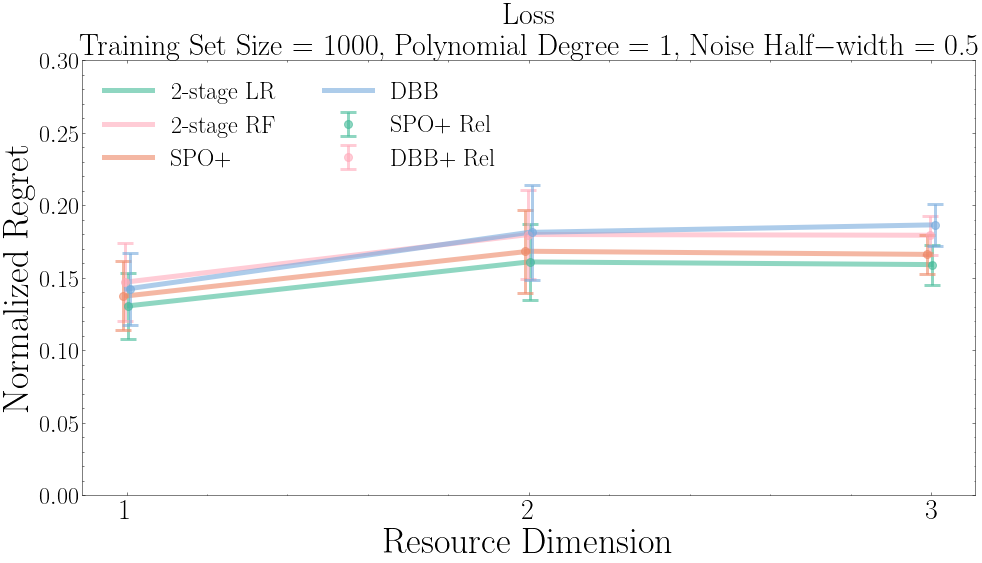

In [7]:
n = 1000
d = 1
e = 0.5
drawPlot(dims, n, d, e)

## Deg = 2 

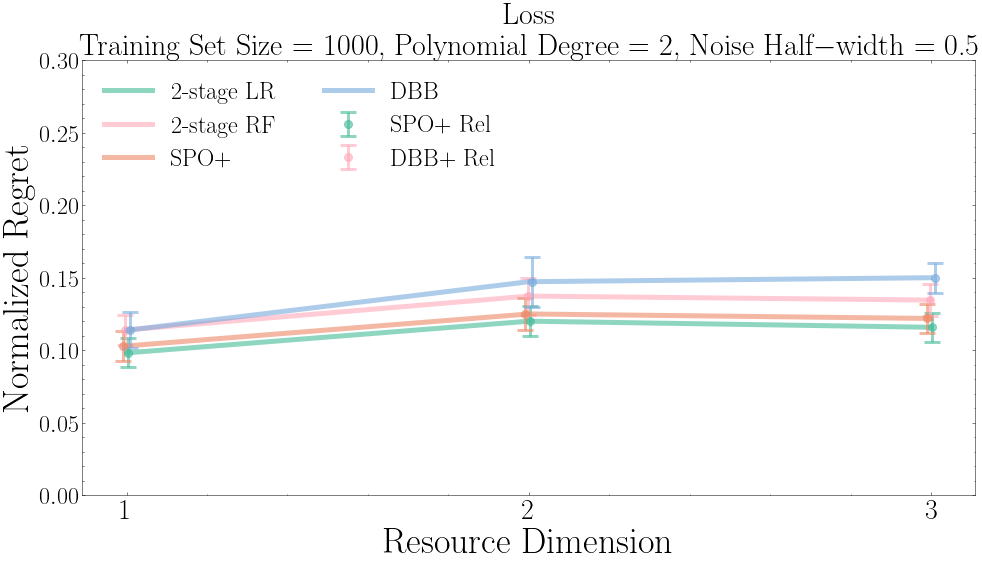

In [8]:
n = 1000
d = 2
e = 0.5
drawPlot(dims, n, d, e)

## Deg = 4 

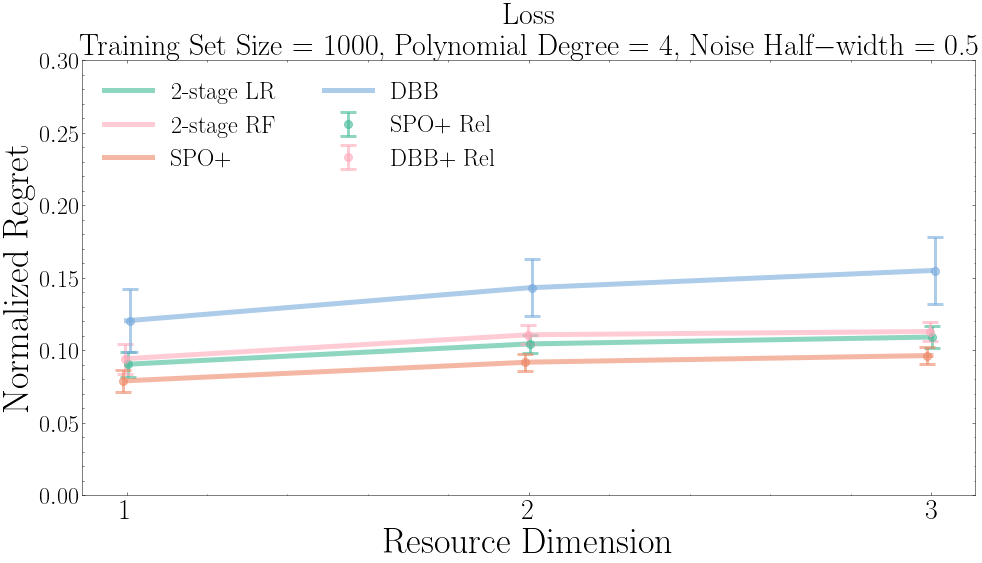

In [9]:
n = 1000
d = 4
e = 0.5
drawPlot(dims, n, d, e)

## Deg = 6 

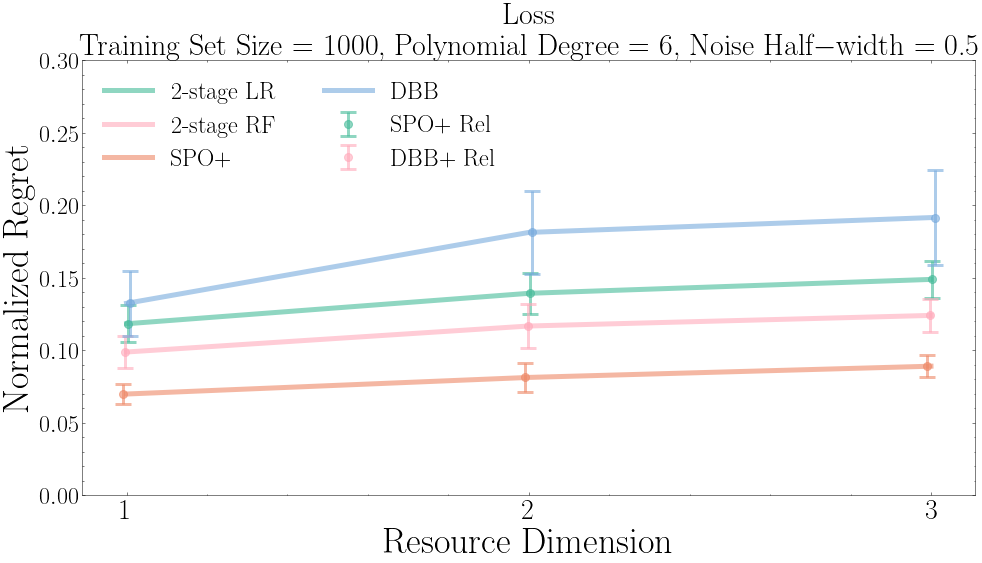

In [10]:
n = 1000
d = 6
e = 0.5
drawPlot(dims, n, d, e)